# Load Library

In [136]:
# 필요 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re                          # 정규표현식
import PIL                         # 이미지 처리
import itertools                   # 중첩 리스트 제거
from emoji import core             # 이모티콘 제거
from konlpy.tag import Hannanum    # 형태소 분석
from wordcloud import WordCloud    # 워드클라우드
from collections import Counter    # 고유값 개수 카운트

In [3]:
plt.rc('font', family='Malgun Gothic') # 그래프 한글 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 출력 오류 설정
pd.set_option('display.max_columns', None) # 데이터프레임 모든 열 출력 설정

# Load Data

In [4]:
# sheet_name=None 옵션으로 모든 시트 데이터 불러오기
origin_data = pd.read_excel('./datasets/BDAA_data.xlsx', sheet_name=None)
# 앞서 불러온 데이터는 key가 1월~9월, value가 해당 월의 데이터프레임인 dict형이므로
# pd.concat() 메서드로 모든 데이터가 들어간 데이터프레임 생성
origin_data = pd.concat(origin_data, ignore_index=True)

In [5]:
# 원본(origin_data)를 copy()하여 복사본으로 분석 진행
df = origin_data.copy()

In [6]:
# df의 처음 다섯 행
df.head()

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,배송회수구분,진행단계,진행상태 (약식),구매확정,주문완료일시,구매확정일시,출고지시일,예외처리구분,상태처리일시,배송상품유형,배송처리유형,배송수단,배송예약구분,배송회차,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,추가옵션,주문판매유형,상품유형,브랜드,판매가,수량,표준카테고리,모델번호,롯데맴버스오프라인고객번호,롯데맴버스온라인고객번호,회원번호
0,2022-01-31 23:59:43,2022013116206973,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,alls****,NaN,2022013116206973_1,주문,배송,배송완료,NaN,구매확정,2022-01-31 23:59:43,2022-02-11T02:33:14,2022-02-01,NaN,2022-02-03,일반상품,업체배송,일반택배,일반배송,NaN,[CJ직배송]비비고 플랜테이블왕교자420gX5개,단일상품,LO1661932052,[CJ직배송]비비고 플랜테이블왕교자420gX5개,LO1661932052_1661932053,단일상품,[],일반판매상품,일반판매_일반상품,씨제이제일제당,24900,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,NaN,NaN,NaN,NaN
1,2022-01-31 23:44:09,2022013116204996,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,okok****,CHT,2022013116204996_1,주문,배송,배송완료,NaN,구매확정,2022-01-31 23:44:09,2022-02-12T03:13:06,2022-02-01,NaN,2022-02-04,일반상품,업체배송,일반택배,일반배송,NaN,CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개 + 초고추장 증정,단일상품,LO1501739050,CJ 해찬들 우리쌀로만든태양초골드고추장2kgP X 2개 + 초고추장 증정,LO1501739050_1501739051,단일상품,[],일반판매상품,일반판매_일반상품,씨제이제일제당,26050,1,가공식품 > 장류 > 고추장/초고추장,NaN,NaN,NaN,NaN
2,2022-01-31 23:44:09,2022013116204996,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,okok****,CHT,2022013116204996_2,주문,배송,배송완료,NaN,구매확정,2022-01-31 23:44:09,2022-02-12T03:13:12,2022-02-01,NaN,2022-02-04,일반상품,업체배송,일반택배,일반배송,NaN,CJ 비비고 수제고기만두x2개+수제김치만두x2개,단일상품,LO1255043241,CJ 비비고 수제고기만두x2개+수제김치만두x2개,LO1255043241_1255043242,단일상품,[],일반판매상품,일반판매_일반상품,씨제이제일제당,22620,1,냉장/냉동/간편식 > 떡볶이/만두 > 만두,NaN,NaN,NaN,NaN
3,2022-01-31 23:35:27,2022013116204259,APP,일반주문,디폴트 채널상세,LPOINT통합회원,fire****,SCH스팸,2022013116204259_1,주문,배송,배송완료,NaN,구매확정,2022-01-31 23:35:27,2022-02-12T03:13:08,2022-02-01,NaN,2022-02-04,일반상품,업체배송,일반택배,일반배송,NaN,스팸 25% 라이트 340g x 6입,단일상품,LO1135070765,스팸 25% 라이트 340g x 6입,LO1135070765_1135070766,단일상품,[],일반판매상품,일반판매_일반상품,씨제이제일제당,40000,1,가공식품 > 통조림/캔 > 햄통조림,NaN,NaN,NaN,NaN
4,2022-01-31 23:21:06,2022013116202890,APP,일반주문,디폴트 채널상세,LPOINT통합회원,dkfm****,SCH비비고국,2022013116202890_1,주문,배송,배송완료,NaN,구매확정,2022-01-31 23:21:06,2022-02-13T02:42:50,2022-01-31,NaN,2022-02-05,일반상품,업체배송,일반택배,일반배송,NaN,비비고 소고기장터국 500G *5,단일상품,LO1234937569,비비고 소고기장터국 500G *5,LO1234937569_1234937574,단일상품,[],일반판매상품,일반판매_일반상품,씨제이제일제당,22030,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,NaN


각 행은 고객 한 명의 주문 데이터를 나타낸다. 특성은 '주문접수일시', '주문번호', ..., '롯데맴버스온라인고객번호', '회원번호' 등 총 41개다.

In [7]:
# df의 요약통계량
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102077 entries, 0 to 102076
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   주문접수일시         102077 non-null  object 
 1   주문번호           102077 non-null  int64  
 2   유입매체           102077 non-null  object 
 3   주문구분           102077 non-null  object 
 4   유입채널           102077 non-null  object 
 5   회원구분           102077 non-null  object 
 6   아이디            98430 non-null   object 
 7   전시유입코드         89492 non-null   object 
 8   상품주문번호         102077 non-null  object 
 9   유형             102077 non-null  object 
 10  배송회수구분         102077 non-null  object 
 11  진행단계           102077 non-null  object 
 12  진행상태 (약식)      0 non-null       float64
 13  구매확정           102077 non-null  object 
 14  주문완료일시         101745 non-null  object 
 15  구매확정일시         93595 non-null   object 
 16  출고지시일          93528 non-null   object 
 17  예외처리구분         24 non-null   

데이터는 총 102,077개로 몇몇 칼럼에서 결측치가 많이 보인다.

In [8]:
# df의 기술통계량
df.describe(include="all")

,주문접수일시,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,배송회수구분,진행단계,진행상태 (약식),구매확정,주문완료일시,구매확정일시,출고지시일,예외처리구분,상태처리일시,배송상품유형,배송처리유형,배송수단,배송예약구분,배송회차,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,추가옵션,주문판매유형,상품유형,브랜드,판매가,수량,표준카테고리,모델번호,롯데맴버스오프라인고객번호,롯데맴버스온라인고객번호,회원번호
count,102077,1.020770e+05,102077,102077,102077,102077,98430,89492,102077,102077,102077,102077,0.0,102077,101745,93595,93528,24,102077,102077,102077,102077,102077,0.0,102077,102077,102077,102077,102077,102077,102077,102077,102077,102076,102077.000000,102077.000000,102077,0.0,3.559700e+04,3.571300e+04,3.970900e+04
unique,92771,NaN,5,2,551,5,53400,3388,102076,4,2,6,NaN,3,92467,38159,277,3,284,1,1,1,1,NaN,2188,489,1662,2185,2096,489,1,1,1,2,NaN,NaN,65,NaN,NaN,NaN,NaN
top,2022-08-30 15:17:36,NaN,APP,일반주문,디폴트 채널상세,LPOINT통합회원,****,CHT,2022051711380533_1,주문,배송,배송완료,NaN,구매확정,2022-08-30 15:17:36,2022-08-25T02:13:14,2022-08-07,구매확정후취소,2022-08-05,일반상품,업체배송,일반택배,일반배송,NaN,비비고 사골곰탕 500g x18봉,단일상품,LO1032764663,비비고 사골곰탕 500g x18봉,LO1032764663_1032764664,단일상품,[],일반판매상품,일반판매_일반상품,씨제이제일제당,NaN,NaN,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,NaN,NaN,NaN,NaN
freq,22,NaN,66517,101439,63866,95664,406,28402,2,93346,101873,93306,NaN,93595,22,191,8014,19,4559,102077,102077,102077,102077,NaN,5267,71296,5468,5267,5468,71296,102077,102077,102077,54154,NaN,NaN,26564,NaN,NaN,NaN,NaN
mean,NaN,2.022066e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26522.711463,1.216542,NaN,NaN,1.490261e+08,1.351843e+07,1.109636e+10
std,NaN,1.857317e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14879.584181,2.103725,NaN,NaN,3.533686e+08,1.757560e+07,3.108948e+09
min,NaN,2.022010e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800.000000,1.000000,NaN,NaN,5.486900e+04,1.067000e+03,1.000000e+10
25%,NaN,2.022061e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20000.000000,1.000000,NaN,NaN,8.925913e+06,4.848423e+06,1.000497e+10
50%,NaN,2.022071e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24000.000000,1.000000,NaN,NaN,2.249812e+07,1.017329e+07,1.001044e+10
75%,NaN,2.022081e+15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30700.000000,1.000000,NaN,NaN,3.099640e+07,1.564479e+07,1.001666e+10


이 중 유용한 숫자형 특성에 대해 히스토그램을 출력한 것은 다음과 같다.

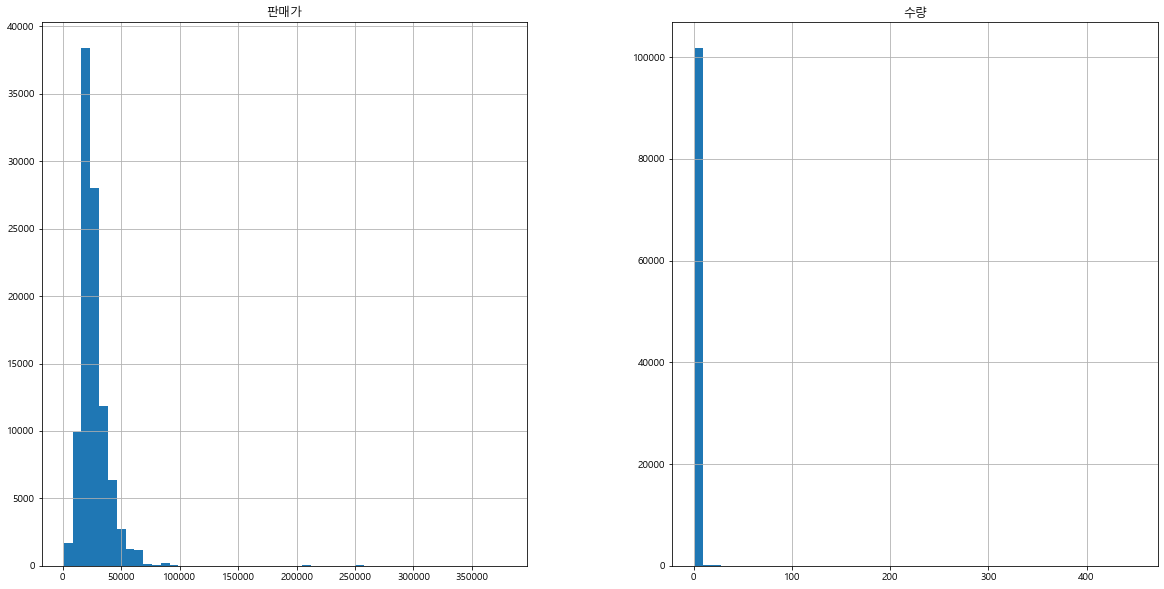

In [9]:
df[['판매가', '수량']].hist(bins=50, figsize=(20,10))
plt.show()

두 히스토그램 모두 오른쪽 꼬리가 더 두꺼운 모습을 보이며 '수량' 같은 경우에는 대부분 1~10에 집중된 모습을 확인할 수 있다.

# 전처리

<code>info()</code>메서드의 확인 결과, 모든 칼럼이 null 값인 '진행상태 (약식)', '배송회차', '모델번호' 칼럼은 제거한다.

In [10]:
df = df.drop(columns=['진행상태 (약식)', '배송회차', '모델번호'])

또한, 확인 결과 단일 값으로만 채워진 칼럼인 '배송상품유형', '배송처리유형', '배송수단', '배송예약구분', '추가옵션', '주문판매유형'도 제거한다.

In [11]:
df = df.drop(columns=['배송상품유형', '배송처리유형', '배송수단', '배송예약구분', '추가옵션', '주문판매유형', '상품유형'])

'예외처리구분'도 전체 102,077개 데이터 중 24개를 제외한 나머지 값이 null 값이므로 제거한다(실제 값으로만 봤을 때도 특별히 추출할 만한 인사이트가 존재하지 않아 보인다).

In [12]:
df['예외처리구분'].value_counts(dropna=False)  # '예외처리구분' 칼럼 고유값 확인

NaN            102053
구매확정후취소            19
미수령신고접수철회요청         4
발송약정                1
Name: 예외처리구분, dtype: int64

In [13]:
df = df.drop(columns=['예외처리구분']) # '예외처리구분' 칼럼 제거

'브랜드' 칼럼은 2개의 값이지만 둘 사이에 차이가 없으므로 제거한다.

In [14]:
df['브랜드'].value_counts(normalize=True)

씨제이제일제당    0.530526
CJ제일제당     0.469474
Name: 브랜드, dtype: float64

In [15]:
# 각 브랜드의 전시상품명 20개 추출
for k, v in df.groupby('브랜드'):
    print('* key: ', k)
    display(v['전시상품명'].value_counts()[:20])

* key:  CJ제일제당


CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]                           4599
미역국 X 5개 + 사골곰탕 X2개+ 육개장300g 2봉 증정(증정품 유통기한 22년 10월 7일까지)    4188
CJ 햇반 쿡반 주먹밥 5종 골라담기                                         2486
[CJ직배송]백설100%통참깨참기름300ML X 2개                                2244
[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]             2032
비비고 왕교자1.05KG X 2개                                           1880
[CJ직배송] CJ 햇반 백미 210g x 36개                                  1664
[6+6+6 선착순 특가]다담 정통된장찌개/청국장찌개/순두부찌개 外 골라담기                   1556
[햇반 솥반 X 서울체크인]햇반 솥반 7종                                      1496
[컵반 배그에디션]이겼닭 오늘 저녁은 치킨이닭(컵반 1개당 G코인 100~10,000코인 랜덤 증정)     1110
비비고 사골곰탕 500g x18봉                                           1069
[CJ직배송]쁘띠첼 5종 세트_30개(포도파인애플복숭아밀감 망고)                         1004
[CJ직배송] New 햇반 210g*3입X 8개(총24개)                              873
[CJ직배송]포도+사과+오렌지 워터젤리 총 30개[각10개씩]                            805
[Lpoint&스벅커피쿠폰증정]햇반 솥반 프리미엄 6종 골라담기[택 1]                      688
[전참시 속 보양식

* key:  씨제이제일제당


비비고 사골곰탕 500g x18봉                                            4198
[CJ직배송]포도씨유 900ML X 2개                                        3762
[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)    3241
비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]          2613
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                             1474
[6+3+5%추가쿠폰]비비고 프리미엄 죽 6개 골라담기 +보양닭백숙죽 3개 증정                  1226
[CJ직배송][CJ] 비비고 왕교자1.05KG X 3봉 + 수제고기만두 증정                    1197
CJ 햇반 쿡반 주먹밥 5종 골라담기                                          1048
[6+3]비비고 프리미엄 죽 6개 골라담기 +통단팥죽 3개 증정                           1025
[전참시 속 보양식사]누룽지닭백숙죽/전복삼계죽/녹두닭죽 外 + 보양닭백숙죽 증정                   961
[2+1][3+2]CJ제일제당 쁘띠첼 미초 석류+청포도+복숭아 外 골라담기                      873
[5%추가쿠폰 확인]비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                   744
[CJ직배송]CJ 고메 중화짬뽕 + 중화짜장 + 탕수육 + 깐풍기 세트                        724
왕교자 1.05kgx2 + 김치왕교자 420gx2                                    694
[CJ직배송]햇반작은공기130G x36개                                        

In [16]:
df = df.drop(columns=['브랜드'])

새로운 칼럼 '총결제금액' = '판매가' × '수량'을 생성한다(고객이 주문한 물건의 총 결제 금액).

In [17]:
df['총결제금액'] = df['판매가'] * df['수량']

전체 칼럼 중 다음 칼럼은 시계열 데이터로 변환하는 것이 더 분석에 용이하다.

In [18]:
df[['주문접수일시', '주문완료일시', '구매확정일시', '출고지시일', '상태처리일시']]

,주문접수일시,주문완료일시,구매확정일시,출고지시일,상태처리일시
0,2022-01-31 23:59:43,2022-01-31 23:59:43,2022-02-11T02:33:14,2022-02-01,2022-02-03
1,2022-01-31 23:44:09,2022-01-31 23:44:09,2022-02-12T03:13:06,2022-02-01,2022-02-04
2,2022-01-31 23:44:09,2022-01-31 23:44:09,2022-02-12T03:13:12,2022-02-01,2022-02-04
3,2022-01-31 23:35:27,2022-01-31 23:35:27,2022-02-12T03:13:08,2022-02-01,2022-02-04
4,2022-01-31 23:21:06,2022-01-31 23:21:06,2022-02-13T02:42:50,2022-01-31,2022-02-05
...,...,...,...,...,...
102072,2022-09-01 00:34:45,2022-09-01 00:34:45,2022-09-10T03:01:47,2022-09-01,2022-09-02
102073,2022-09-01 00:34:29,2022-09-01 00:34:29,2022-09-13T02:21:20,2022-09-01,2022-09-05
102074,2022-09-01 00:34:29,2022-09-01 00:34:29,2022-09-13T02:21:18,2022-09-01,2022-09-05
102075,2022-09-01 00:20:30,2022-09-01 00:20:30,NaN,NaN,2022-09-01


따라서, <code>pd.to_datetime()</code>로 object형에서 datetime형으로 변환했다.

In [19]:
df[['주문접수일시', '주문완료일시', '구매확정일시', '출고지시일', '상태처리일시']] = df[['주문접수일시', '주문완료일시', '구매확정일시', '출고지시일', '상태처리일시']].apply(pd.to_datetime)

현재 df의 칼럼은 다음과 같다.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102077 entries, 0 to 102076
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   주문접수일시         102077 non-null  datetime64[ns]
 1   주문번호           102077 non-null  int64         
 2   유입매체           102077 non-null  object        
 3   주문구분           102077 non-null  object        
 4   유입채널           102077 non-null  object        
 5   회원구분           102077 non-null  object        
 6   아이디            98430 non-null   object        
 7   전시유입코드         89492 non-null   object        
 8   상품주문번호         102077 non-null  object        
 9   유형             102077 non-null  object        
 10  배송회수구분         102077 non-null  object        
 11  진행단계           102077 non-null  object        
 12  구매확정           102077 non-null  object        
 13  주문완료일시         101745 non-null  datetime64[ns]
 14  구매확정일시         93595 non-null   datetime64[ns]
 15  

제공된 시계열 데이터를 편리하게 다루기 위해서 <code>set_index()</code>로 '주문접수일시'를 index로 설정한다.

In [21]:
df = df.set_index('주문접수일시') # '주문접수일시'를 index로 설정
df = df.sort_index() # 시간순으로 정렬

# 특성별 매출 분석

다음 <code>plot_line()</code>는 주어진 시계열 데이터를 선 그래프로 나타내주는 함수로, <strong>5.2 월별 매출 분석, 5.3 요일별 매출 분석, 5.4 시간별 매출 분석</strong>에서 사용할 예정이다.

In [22]:
def plot_line(df, title):
    fig, ax = plt.subplots(figsize=(20, 10))
    df.plot.line(ax=ax, color='gray', marker='o', markersize=10)
    ax.set_title(title, fontsize=30)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(None)

In [23]:
total_revenue = df['총결제금액'].sum() # 전체 매출

print('전체 매출:', format(total_revenue, ','), '원')

전체 매출: 3,098,468,564 원


## 유입매체별 매출 분석
'유입매체'에는 APP, MO WEB, PC, TABLET, 삼성냉장고로 총 5가지가 있는데, <strong>5.1 유입매체별 분석</strong>에서는 어떤 매체로 유입되어 결제에 가장 크게 기여를 했는지 알아보도록 한다.

In [24]:
df_by_media = df.groupby('유입매체').sum()['총결제금액'].sort_values(ascending=False) # 유입매체별 매출
df_by_media.map(lambda x: format(x, ',') + ' 원')

유입매체
APP       1,912,495,622 원
MO WEB      631,604,292 원
PC          550,635,987 원
TABLET        3,675,533 원
삼성냉장고            57,130 원
Name: 총결제금액, dtype: object

다음은 유입매체별 매출을 비율로 나타낸 그래프다.

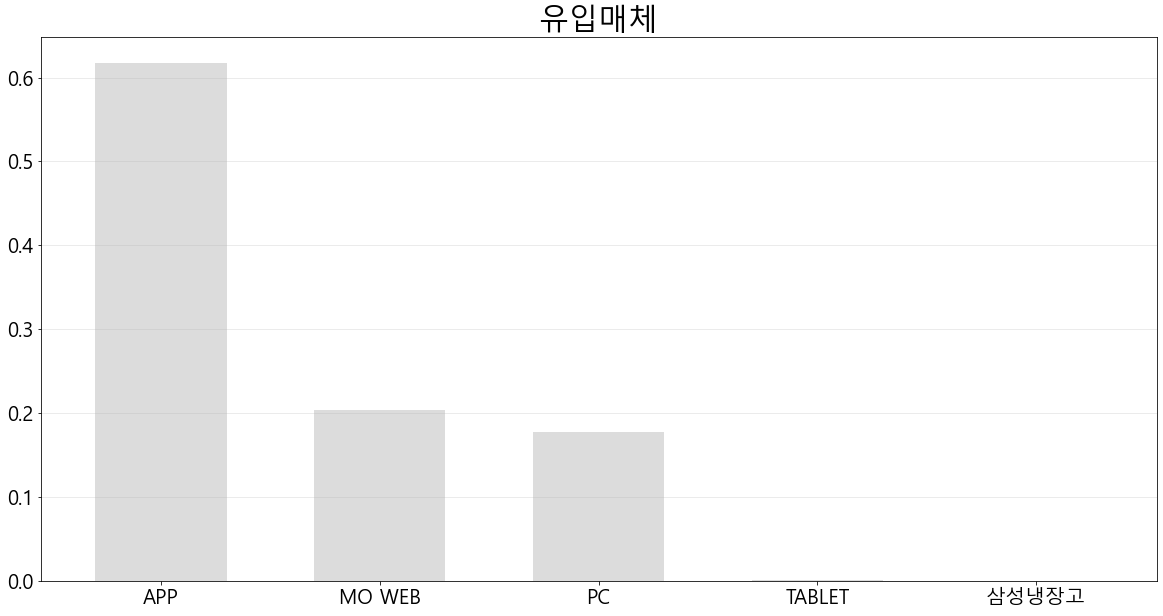

In [25]:
fig, ax = plt.subplots(figsize=(20, 10))
(df_by_media / total_revenue).plot.bar(ax=ax, color='#DCDCDC', width=0.6)
ax.set_title('유입매체', fontsize=30)
ax.set_xticklabels(df_by_media.index, rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, axis='y', alpha=0.3)
plt.xlabel(None)
plt.show()

각 매체별 비율은 다음과 같다.

In [26]:
df_by_media / total_revenue

유입매체
APP       0.617239
MO WEB    0.203844
PC        0.177712
TABLET    0.001186
삼성냉장고     0.000018
Name: 총결제금액, dtype: float64

### 유입매체별 분석 결과

<ol>
    <li><strong>매출의 절반 이상(61.7%)이 APP을 통해 진행되었다.</strong></li>
    </ol>

## 월별 매출 분석

본 절에서는 데이터의 index인 '주문접수일시'를 기준으로 월별 매출을 분석하고자 한다.

In [27]:
df_by_month = df.groupby(df.index.month).sum()['총결제금액']
df_by_month.map(lambda x: format(x, ',') + ' 원')

주문접수일시
1    133,075,747 원
2     44,968,578 원
3    119,258,980 원
4    103,297,653 원
5    353,585,139 원
6    646,516,214 원
7    494,131,772 원
8    987,290,226 원
9    216,344,255 원
Name: 총결제금액, dtype: object

다음은 월별 매출을 시각화한 그래프다.

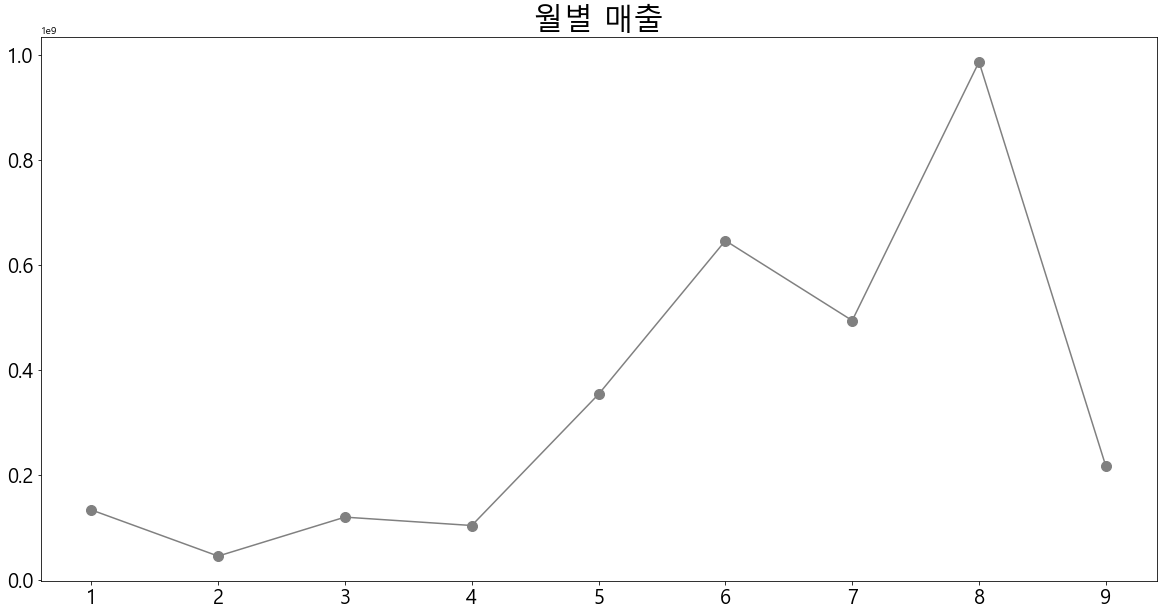

In [28]:
plot_line(df_by_month, "월별 매출")

월별 매출을 비율로 나타내고 내림차순으로 정렬한다.

In [29]:
(df_by_month / total_revenue).sort_values(ascending=False)

주문접수일시
8    0.318638
6    0.208657
7    0.159476
5    0.114116
9    0.069823
1    0.042949
3    0.038490
4    0.033338
2    0.014513
Name: 총결제금액, dtype: float64

### 월별 매출 분석 결과

<ol>
    <li><strong>2월 매출이 1.46%로 매출이 제일 적다.</strong></li>
    <li><strong>매출의 절반이 8월(31.9%)과 6월(20.9%)에 집중되어 있다.</strong></li>
    </ol>

## 요일별 매출 분석

본 절에서는 요일마다의 매출 분석을 하고자 한다.

In [30]:
df_by_dow = df.groupby(lambda date: date.dayofweek).sum()['총결제금액']
# index가 0~6이므로 가독성을 위해 요일 인덱스로 교체
day_of_week = np.array(['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']) 
df_by_dow.index = day_of_week
df_by_dow.agg(lambda x: format(x, ',') + ' 원')

Mon     458,464,818 원
Tue     296,925,075 원
Wed     631,940,556 원
Thur    507,220,957 원
Fri     379,851,722 원
Sat     335,336,804 원
Sun     488,728,632 원
Name: 총결제금액, dtype: object

다음은 요일별 매출을 시각화한 그래프다.

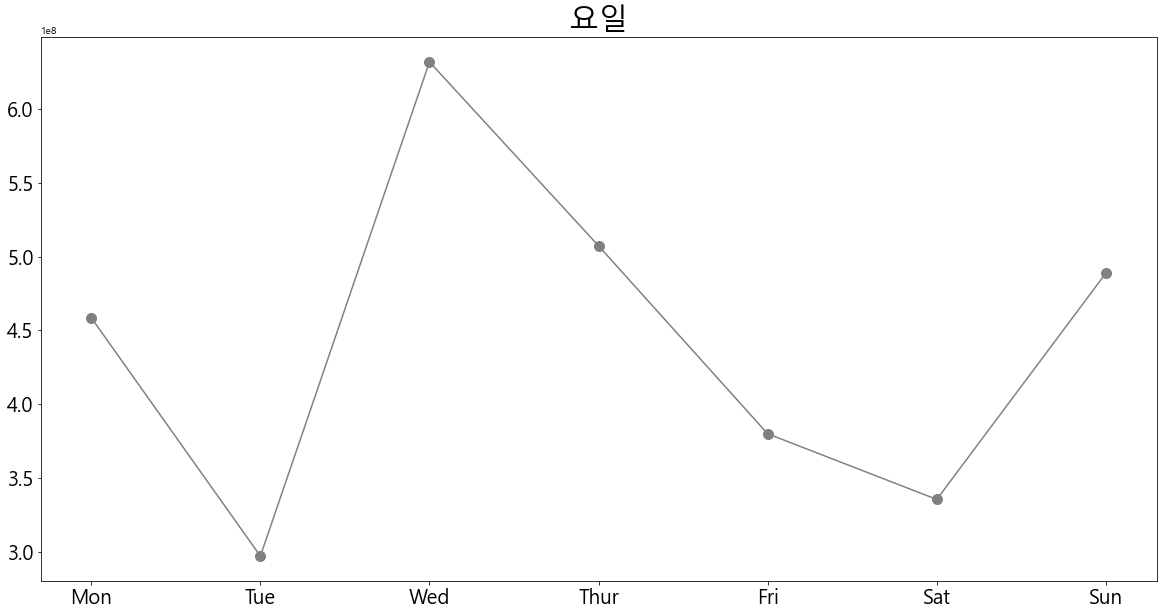

In [31]:
plot_line(df_by_dow, '요일')

요일별 매출을 비율로 나타내고 내림차순으로 정렬한다.

In [32]:
(df_by_dow / total_revenue).sort_values(ascending=False)

Wed     0.203953
Thur    0.163701
Sun     0.157732
Mon     0.147965
Fri     0.122593
Sat     0.108227
Tue     0.095830
Name: 총결제금액, dtype: float64

### 요일별 매출 분석 결과

빅인사이트 분석 결과, 월요일 오전 10시에 온라인 쇼핑 구매 건수가 가장 높게 나왔다고 하여 월요일에 매출이 많을 것으로 예상했지만, 수요일에 가장 매출이 많았다.

<ol>
    <li><strong>수요일의 매출이 20.4%로 가장 높았으며, 토요일 매출이 9.6%로 가장 낮았다.</strong></li></ol>

## 시간별 매출 분석

본 절에서는 0~23시까지의 매출 분석을 하고자 한다.

In [33]:
df_by_hour = df.groupby(df.index.hour).sum()['총결제금액']
df_by_hour.index = df_by_hour.index.astype(str)
df_by_hour.map(lambda x: format(x, ',') + ' 원')

주문접수일시
0     117,539,220 원
1      86,730,193 원
2      49,868,450 원
3      31,446,342 원
4      23,444,618 원
5      24,415,238 원
6      43,029,532 원
7      93,193,334 원
8     161,674,234 원
9     175,159,596 원
10    174,694,449 원
11    175,283,748 원
12    158,558,328 원
13    153,291,047 원
14    133,311,899 원
15    131,942,454 원
16    139,759,786 원
17    147,039,592 원
18    155,297,736 원
19    141,325,484 원
20    153,209,976 원
21    172,837,210 원
22    215,478,259 원
23    239,937,839 원
Name: 총결제금액, dtype: object

다음은 시간별 매출 그래프를 나타낸 것이다.

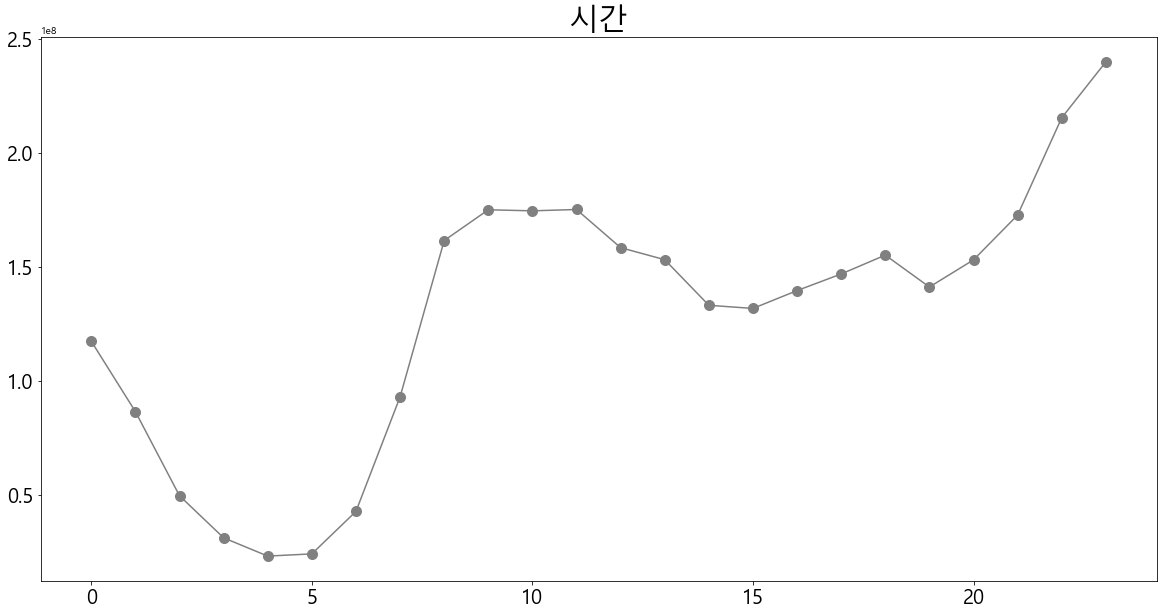

In [34]:
plot_line(df_by_hour, title='시간')

0시부터 4시까지 하락세, 그 후 11시까지 증가세를 보이다가 15시까지는 다시 하락을, 그 후에는 증가세를 보인다.

In [35]:
(df_by_hour / total_revenue).sort_values(ascending=False)

주문접수일시
23    0.077438
22    0.069543
11    0.056571
9     0.056531
10    0.056381
21    0.055781
8     0.052179
12    0.051173
18    0.050121
13    0.049473
20    0.049447
17    0.047456
19    0.045611
16    0.045106
14    0.043025
15    0.042583
0     0.037935
7     0.030077
1     0.027991
2     0.016095
6     0.013887
3     0.010149
5     0.007880
4     0.007567
Name: 총결제금액, dtype: float64

### 시간별 매출 분석 결과

<ol>
    <li><strong>오전 4시에 0.8%로 매출이 제일 적다.</strong></li>
    <li><strong>오전과 오후 둘 다 9~11시에 매출이 집중되어 있다(37.2%)</strong></li>
</ol>

## 유입채널별 매출 분석

본 절에서는 고객이 물품을 사기위해 들어오는 경로를 기준으로 매출을 분석하고자 한다.

In [36]:
df_by_ch = df.groupby('유입채널').sum()['총결제금액'].sort_values(ascending=False)[:10]
df_by_ch.agg(lambda x: format(x, ',') + ' 원')

유입채널
디폴트 채널상세                 1,964,645,663 원
유실 채널상세                    461,193,707 원
[네이버] PCS 가격비교_롯데ON        264,904,635 원
[에누리] PCS 가격비교_롯데ON         48,651,418 원
[다음카카오] PCS 가격비교_롯데ON       42,483,385 원
[모바일]다른앱공유하기                34,925,770 원
[다나와] PCS 가격비교_롯데ON         30,035,639 원
[모바일]카카오톡                   28,463,764 원
[네이버] 키워드_쇼핑검색광고_롯데ON       25,025,255 원
[링크프라이스] CPS_롯데온            13,264,200 원
Name: 총결제금액, dtype: object

다음은 유입채널별 매출 분석을 한 그래프다.

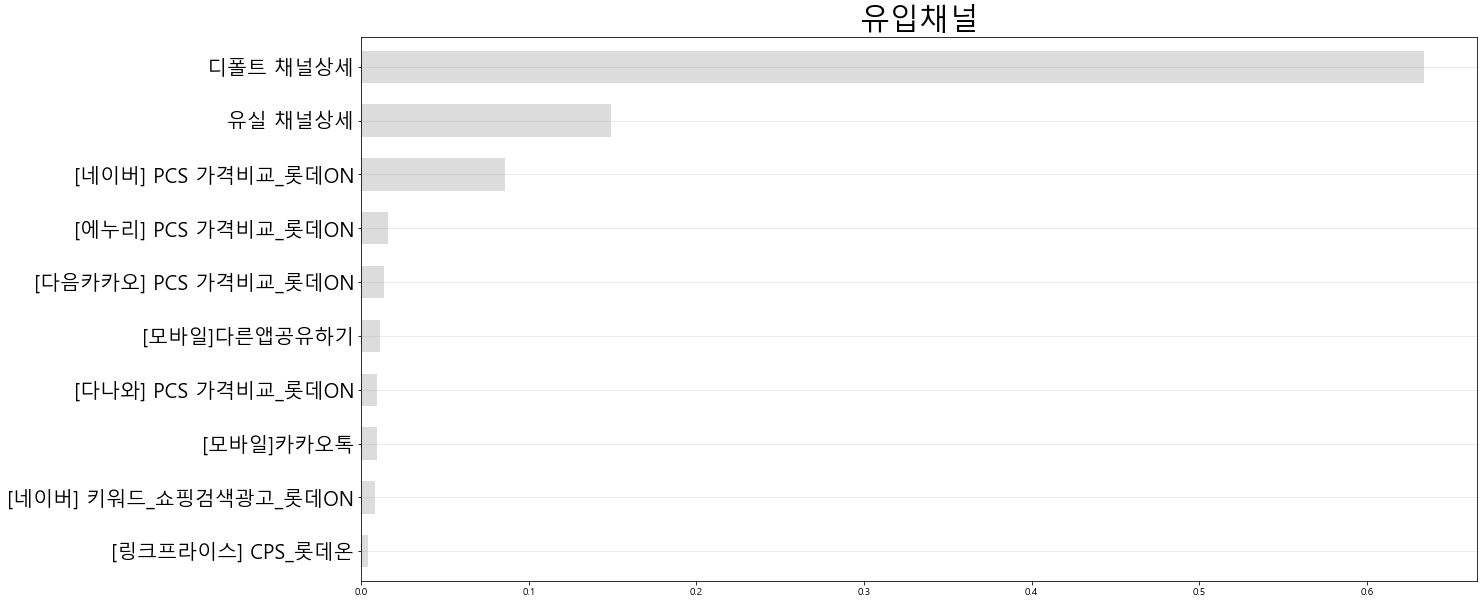

In [56]:
fig, ax = plt.subplots(figsize=(20, 10))
(df_by_ch / total_revenue).sort_values(ascending=True).plot.barh(ax=ax, color='#DCDCDC', width=0.6)
ax.set_title('유입채널', fontsize=30)
ax.set_yticklabels(df_by_ch.index[::-1], rotation=0, fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, axis='y', alpha=0.3)
plt.ylabel(None)
plt.show()

디폴트 채널상세가 눈에 띄게 많은 매출에 기여하고 있다.

In [58]:
df_by_ch / total_revenue

유입채널
디폴트 채널상세                 0.634070
유실 채널상세                  0.148846
[네이버] PCS 가격비교_롯데ON      0.085495
[에누리] PCS 가격비교_롯데ON      0.015702
[다음카카오] PCS 가격비교_롯데ON    0.013711
[모바일]다른앱공유하기             0.011272
[다나와] PCS 가격비교_롯데ON      0.009694
[모바일]카카오톡                0.009186
[네이버] 키워드_쇼핑검색광고_롯데ON    0.008077
[링크프라이스] CPS_롯데온         0.004281
Name: 총결제금액, dtype: float64

### 유입채널별 매출 분석 결과

<ol>
    <li><strong>전체 매출의 63.4%가 디폴트 채널상세로 유입되었다.</strong></li>
    </ol>

## 매출 분석으로부터 얻을 수 있는 결론

<ol>
    <li><strong>매출의 절반 이상(61.7%)이 APP을 통해 진행되었다.</strong></li>
    <li><strong>2월 매출이 1.46%로 매출이 제일 적다.</strong></li>
    <li><strong>매출의 절반이 8월(31.9%)과 6월(20.9%)에 집중되어 있다.</strong></li>
    <li><strong>수요일의 매출이 20.4%로 가장 높았으며, 토요일 매출이 9.6%로 가장 낮았다.</strong></li>
    <li><strong>오전 4시에 0.8%로 매출이 제일 적다.</strong></li>
    <li><strong>오전과 오후 둘 다 9~11시에 매출이 집중되어 있다(37.2%)</strong></li>
    <li><strong>전체 매출의 63.4%가 디폴트 채널상세로 유입되었다.</strong></li>
</ol>

# 매출 상위 제품 분석

다음은 총결제금액 기준으로 가장 많이 팔린 상위 10개의 제품이다.

In [38]:
S_top10 = df.groupby('전시상품명').sum()['총결제금액'].sort_values(ascending=False)[:10]
S_top10.agg(lambda x: format(x, ',') + ' 원')

전시상품명
비비고 사골곰탕 500g x18봉                                            132,669,000 원
[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1,000set 한정)    127,693,200 원
[CJ직배송]포도씨유 900ML X 2개                                        108,036,330 원
CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]                            103,069,000 원
[CJ직배송] CJ 햇반 백미 210g x 36개                                    86,557,600 원
미역국 X 5개 + 사골곰탕 X2개+ 육개장300g 2봉 증정(증정품 유통기한 22년 10월 7일까지)      85,629,500 원
CJ 햇반 쿡반 주먹밥 5종 골라담기                                           78,682,860 원
비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조림볶음밥]           76,259,300 원
[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]               65,818,500 원
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                              63,032,400 원
Name: 총결제금액, dtype: object

이들 상위 10개의 제품은 전체 수량의 약 30%를 차지한다.

In [39]:
S_top10.sum() / df['총결제금액'].sum()

0.2993245439943085

그리고 밑의 표는 상위 10개의 제품의 월별 판매 수량과 총결제금액이다.

In [59]:
monthly_top10 = df.groupby(['전시상품명', df.index.month]) \
                .sum()[['수량', '총결제금액']].loc[S_top10.index]
monthly_top10

수량      총결제금액
전시상품명                                              주문접수일시                 
비비고 사골곰탕 500g x18봉                                 6       3851   92537000
                                                   7        575   14021500
                                                   8        774   19269000
                                                   9        274    6841500
[Lpoint 1,000P 지급]햇반 작은공기, 100% 현미밥 x 36개 특가 (1... 6       3361  127693200
[CJ직배송]포도씨유 900ML X 2개                             1        150    2753850
                                                   2         37     703000
                                                   3         12     294400
                                                   4        287    6286080
                                                   5       4341   91204000
                                                   6         83    2259000
                                                   7        168    4536000
CJ 스팸 25%라이트/ 스팸클래식 4개 골라담기 [ 택 1]                 8       5064  102857500
                                                   9          9     211500
[CJ직배송] CJ 햇반 백미 210g x 36개                        1         16     711150
                                                   2          5     260800
                                                   3         12     636500
                                                   4         11     574790
                                                   5          8     437800
                                                   6         18    1020060
                                                   7         34    1735500
                                                   8       1616   79049000
                                                   9         41    2132000
미역국 X 5개 + 사골곰탕 X2개+ 육개장300g 2봉 증정(증정품 유통기한 22년... 7        457    9185700
                                                   8       3822   76443800
CJ 햇반 쿡반 주먹밥 5종 골라담기                               4         83    1981240
                                                   5        109    2520720
                                                   6        763   17324900
                                                   7        440   10044000
                                                   8       1679   34128000
                                                   9        627   12684000
비비고 BEST 볶음밥 3종 특가[불고기 비빔밥 + 매콤부추고기볶음밥 + 간장버터장조... 6       5038   74216800
                                                   7        132    1994800
                                                   8          3      47700
[L.Point 3,000p 증정]햇반 오곡밥 24입/ 솥반 7종 골라담기 [ 택 1]   8       2084   65818500
비비고 왕교자 1.05KGx4개+비비고 찐만두 168gx1개                  2         14     464000
                                                   3         75    2762280
                                                   5        982   39048320
                                                   6        329   13345000
                                                   7        113    4616200
                                                   8         41    1943400
                                                   9         18     853200

top10 제품의 경우, 대부분 매출이 급증하는 달이 있으며(예를 들면, '비비고 사골곰탕 500g x18봉' 같은 경우 6월에 매출이 급증했다), 이에 해당하는 달은 다음 그래프를 통해 대부분 6월과 8월임을 알 수 있다.

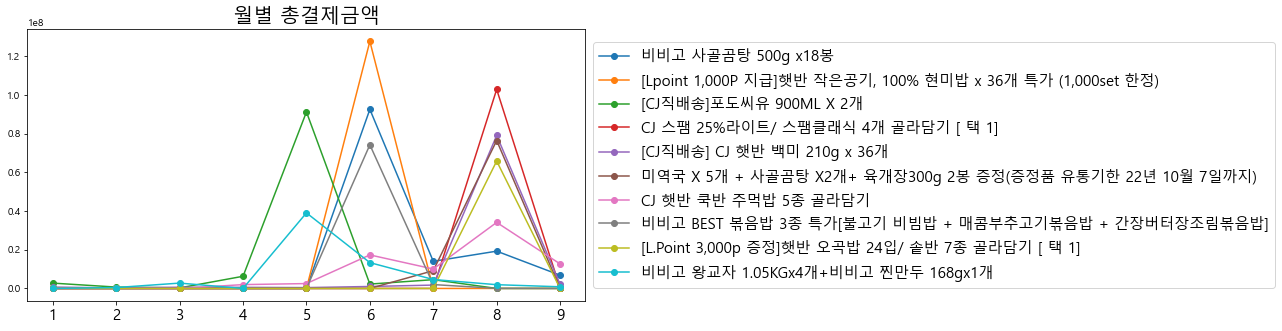

In [60]:
# 총결제금액을 기준으로 월별로 정리 후, 결측치를 0으로 채우고 시각화
monthly_top10.unstack(level=0)['총결제금액'].fillna(0).plot(figsize=(10, 5), marker='o')
# legend 위치 조정
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.title('월별 총결제금액', fontsize=20)
plt.xlabel(None)
plt.xticks(fontsize=15)
plt.show()

## 수량 기준 분석 결과

<ol>
    <li><strong>수량 기준 상위 10개의 제품은 전체 수량의 31.2%를 차지한다.</strong></li>
    <li><strong>수량 기준 상위 10개의 제품은 '[CJ직배송]포도씨유 900ML X 2개'를 제외하고 6월과 8월에 매출이 급증한다.</strong></li>
    </ol>

# 포도씨유

앞서 <strong>6</strong>의 월별 총결제금액 그래프와 <strong>6.1 수량 기준 분석 결과</strong>의 2를 참고하면 '[CJ직배송]포도씨유 900ML X 2개'(이하 포도씨유)가 대부분의 상품 매출이 급증한 6월과 8월이 아닌 5월에 급증한 것을 확인할 수 있다.

또한, <strong>5.5 유입채널별 매출 분석</strong>을 바탕으로 대부분의 상품 구매의 유입은 '디폴트 채널상세'와 '유실 채널상세'인 것을 알 수 있었다.

이에 본 절에서는 다른 상품과 달리 5월에 매출이 급증한 포도씨유가 유입채널에서도 다른 점이 있는지 분석해보고자 한다.

다음 표는 포도씨유 상품 구매이력만 추출하여 유입채널별로 개수를 구한 것이다.

In [61]:
df_t = df[df['전시상품명'] == '[CJ직배송]포도씨유 900ML X 2개'] # 포도씨유 상품만 추출
df_t.groupby(['전시상품명', '유입채널']).count()[['수량']].sort_values(by='수량', ascending=False)

수량
전시상품명                  유입채널                                              
[CJ직배송]포도씨유 900ML X 2개 디폴트 채널상세                                      1346
                       [모바일]다른앱공유하기                                  1076
                       [네이버] PCS 가격비교_롯데ON                            624
                       유실 채널상세                                        449
                       [모바일]카카오톡                                       78
...                                                                   ...
                       [롯데ON][시크릿 혜택이 도착했어요 💝]                          1
                       [롯데ON][알림톡][[롯데ON] 주문취소 안내]                      1
                       [롯데ON][애프터위크 ~7%카드할인💳]                           1
                       [롯데ON][이메일][토요일은 [스포츠레저Day] 스포츠/레저 쿠폰과 함께~!]     1
                       카카오 챗메뉴_1퍼스트먼데이                                  1

[66 rows x 1 columns]

위의 표를 보면 [모바일]다른앱공유하기로 유입하여 포도씨유를 구매한 이력이 총 1,076개이다.

다음 표는 채널별 5월에 포도씨유를 구매한 이력의 개수를 구한 것이다.

In [62]:
mask = (df['전시상품명'] == "[CJ직배송]포도씨유 900ML X 2개") & (df.index.month == 5)
df_t = df[mask]
df_t.groupby(['전시상품명', '유입채널']).count()[['수량']].sort_values(by='수량', ascending=False)

수량
전시상품명                  유입채널                                              
[CJ직배송]포도씨유 900ML X 2개 [모바일]다른앱공유하기                                  1076
                       디폴트 채널상세                                       961
                       [네이버] PCS 가격비교_롯데ON                            538
                       유실 채널상세                                        448
                       [모바일]카카오톡                                       75
                       [다음카카오] PCS 가격비교_롯데ON                           29
                       [에누리] PCS 가격비교_롯데ON                             19
                       [롯데ON][PUSH][실시간 BEST 🕠]                        18
                       [다나와] PCS 가격비교_롯데ON                             16
                       주문완료 배너                                         15
                       [롯데ON] MO Web 행사장_21.07_월간APP혜택                 11
                       [롯데ON][알림톡][[롯데ON] 주문 완료 안내]                     9
                       [네이버] MO_브랜드검색_롯데ON                              7
                       [네이버] 키워드_롯데ON                                   6
                       [네이버] 키워드_쇼핑검색광고_롯데ON                            5
                       [롯데ON][⏳월요일은 푸드Day⏳]                             4
                       [롯데ON][알림톡][[롯데ON] 상품 배송시작 안내]                   4
                       [구글] SA_롯데ON                                     4
                       [롯데ON][☀️온세일로 여름준비☀️]                            4
                       나이스 제휴                                           3
                       [롯데ON][PUSH][🔔장바구니 알리미]                          3
                       [크리테오] WEB RT_롯데ON (로고 영역)                       3
                       [클릭즈] 키워드CPS_애드타겟_롯데ON                           3
                       [네이버] 키워드(lottemart)_롯데마트                        3
                       [롯데ON][출국없이 즐겨요! 면세쇼핑🛍️]                         3
                       [애피어] APP 리타게팅_롯데ON                              2
                       [롯데ON][오늘 단 하루 ⚡퍼스트먼데이⚡]                         2
                       딥링크_DA                                           2
                       (광고) 5월 타임딜 배너(상/하단)                             2
                       [롯데ON][알림톡][[롯데ON] 배송완료 안내]                      2
                       [네이버] PCS 가격비교_엘롯데                               2
                       [롯데ON][PUSH][확인하셨나요? 첫구매 혜택!]                    1
                       딥링크_DABA                                         1
                       [롯데ON] 고객님의 등급이 변경될 예정입니다                        1
                       [롯데ON][N페이하고 5천점 적립 받아요!]                        1
                       [롯데ON][PUSH][⏰10월 8일⏰]                           1
                       webtoapp                                         1
                       [롯데ON][PUSH][쉿! 고객님께만 몰래 드려요🤗]                   1
                       [롯데ON][이메일][토요일은 [스포츠레저Day] 스포츠/레저 쿠폰과 함께~!]     1
                       [롯데ON][알림톡][[롯데ON] 주문취소 안내]                      1
                       [롯데ON][사랑받는 뷰티 선물은?🎁]                            1
                       [롯데ON][시크릿 혜택이 도착했어요 💝]                          1
                       [몰로코] APP 리타게팅_롯데ON                              1
                       [롯데ON][알림톡][[롯데ON] 문의 답변등록 안내]                   1
                       [RTB House] APP 리타게팅_롯데ON                        1
                       [모바일]SMS                                         1
                       [롯데프레시&델리][총 3만3천원 쿠폰팩 100% 증정]                  1
                       [크리테오] APP 리타게팅_롯데ON                             1

마찬가지로 5월에 [모바일]다른앱공유하기로 유입하여 포도씨유를 구매한 이력이 1,076개로 위와 같다. 결론적으로 말하면 [모바일]다른앱공유하기로 유입하여 포도씨유를 구매한 날짜를 보면 모두 5월인 것을 알 수 있다.

다음은 일별 포도씨유 구매 이력이다.

In [70]:
df_t.groupby(df_t.index.day).size()

주문접수일시
1       57
2      202
3       55
4       34
5       25
6       35
7       50
8       61
9        6
12       9
13      10
14      60
15      81
16    1983
17     577
18      14
19       5
20      18
22       9
23       1
26       1
28       1
29       2
dtype: int64

16일과 17일에 구매가 많이 진행되었다.

## 포도씨유 분석 결과

<ol>
    <li><strong>5월에 '[모바일]다른앱공유하기'와 포도씨유 관련하여 진행한 프로모션이 성공적이었음을 알 수 있다.</strong></li>
    <li><strong>5월 16~17일에 포도씨유를 많이 구매했다.</strong></li>
    </ol>

# 유입채널의 가격비교

상품을 구매하러 유입한 채널은 다양하게 있으며 <strong>5.5 유입채널별 매출 분석</strong>에서 언급했듯이 대부분 디폴트 채널상세와 유실 채널상세에 집중되어 있다. 하지만, 유입채널의 종류를 보다보면 '가격비교'가 눈에 띄게 보이는데 어떤 유의미한 관계가 있는지 알아보고자 한다.

이에 본 절에서는 텍스트 마이닝<sup>text mining</sup>을 통해 명사를 추출하여 어떤 단어가 많이 사용됐는지 확인할 것이다.

KoNlPy 패키지의 한나눔<sup>Hannanum</sup>에 넣을 값을 추출한다.

In [71]:
# 유입채널의 모든 값을 list안에 넣고 str형으로 변환
content = str(list(df['유입채널'].values)) 

In [79]:
content[1000:3000]

"교_롯데ON', '디폴트 채널상세', '[네이버] 키워드_쇼핑검색광고_롯데ON', '[네이버] PCS 가격비교_롯데ON', '디폴트 채널상세', '[롯데ON][PUSH][실시간 BEST 🕠]', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '[롯데ON][PUSH][실시간 BEST 🕠]', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '[롯데ON][알림톡][[롯데ON] 주문 완료 안내]', '디폴트 채널상세', '디폴트 채널상세', '[롯데ON][알림톡][[롯데ON] 상품Q&A 답변등록 안내]', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '[네이버] PCS 가격비교_롯데ON', '[네이버] PCS 가격비교_롯데ON', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '디폴트 채널상세', '[롯데ON][🐯해피 뉴 퍼스트먼데이🐯]', '[다음카카오] PCS 가격비교_롯데ON', '[네이버] PCS 가격비교_롯데ON', '디폴트 채널상세', '[네이버] PCS 가격비교_롯데ON', '[롯데ON][PUSH][L.POINT 적립 알림]', '[롯데ON][PUSH][L.POIN

content를 보면 대괄호([]) 같은 특수기호도 있고 이모티콘도 포함되어 있는 것을 확인할 수 있다. 우선 정규표현식을 이용해 특수기호를 제거한다. 원래 영문이나 숫자도 제거하려 했지만, 영문에서 좋은 관계성이 추출될 수도 있기에 제거하지 않고 그대로 가져가기로 한다.

In [80]:
text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ·!』\\‘’|\(\)\[\]\<\>`\'…》]', '', content)

또한, emoji 패키지를 이용해 이모티콘을 제거해준다.

In [82]:
text = core.replace_emoji(text, replace='')
print(text[1000:3000])

채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 롯데ON알림톡롯데ON 주문 완료 안내 디폴트 채널상세 디폴트 채널상세 롯데ON알림톡롯데ON 상품QA 답변등록 안내 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 네이버 PCS 가격비교_롯데ON 네이버 PCS 가격비교_롯데ON 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 롯데ON해피 뉴 퍼스트먼데이 다음카카오 PCS 가격비교_롯데ON 네이버 PCS 가격비교_롯데ON 디폴트 채널상세 네이버 PCS 가격비교_롯데ON 롯데ONPUSHLPOINT 적립 알림 롯데ONPUSHLPOINT 적립 알림 롯데ONPUSHLPOINT 적립 알림 롯데ONPUSHLPOINT 적립 알림 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 네이버 PCS 가격비교_롯데ON 다음카카오 PCS 가격비교_롯데ON 네이버 PCS 가격비교_롯데ON 디폴트 채널상세 디폴트 채널상세 네이버 PCS 가격비교_롯데ON 다음카카오 PCS 가격비교_롯데ON 디폴트 채널상세 카카오 챗메뉴_1퍼스트먼데이 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 다음카카오 PCS 가격비교_롯데ON 롯데ON퍼스트먼데이는 오늘까지 네이버 PCS 가격비교_롯데ON 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 네이버 PCS 가격비교_롯데ON 네이버 PCS 가격비교_롯데ON 디폴트 채널상세 디폴트 채널상세 디폴트 채널상세 롯데ON알림톡롯데ON 주문 완료 안내 디폴트 채널상세 디폴트 채널상세 네이버 

이모티콘이 모두 제거된 것을 확인할 수 있다.

다음으로 KoNlPy의 Hannanum을 이용하여 명사를 추출하고 text_list에 추가한다. 한꺼번에 모든 text를 넣게되면 Hannanum이 정상적으로 작동하지 않아 사전에 테스트하여 적당한 길이인 25,000개로 제한한다.

In [87]:
text_list = []
for i in range(0, len(text)-25000, 25000):
    hannanum = Hannanum()
    t = hannanum.nouns(text[i:i+25000])
    text_list.append(t)

hannanum = Hannanum()
t = hannanum.nouns(text[1050000:len(text)])
text_list.append(t)

현재 text_list는 리스트의 리스트이므로 중첩 리스트를 하나의 리스트에 모두 담아준다.

In [88]:
text_list = list(itertools.chain(*text_list))

text_list

['디폴트',
 '채널상세',
 '다음카카오',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '다음카카오',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '네이버',
 '가격비교_롯데ON',
 '네이버',
 '가격비교_롯데ON',
 '네이버',
 '키워드_쇼핑검색광고_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '다나',
 '가격비교_롯데ON',
 '네이버',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '네이버',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '네이버',
 '가격비교_롯데ON',
 '네이버',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '다음카카오',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '다음카카오',
 '가격비교_롯데ON',
 '네이버',
 '키워드_쇼핑검색광고_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '네이버',
 '키워드_쇼핑검색광고_롯데ON',
 '롯데ONPUSH10월',
 '8일',
 '다음카카오',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '네이버',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '네이버',
 '가격비교_롯데ON',
 '디폴트',
 '채널상세',
 '디폴트',
 '채널상세',
 '다나',
 '가격비교_롯데ON',
 '다나',
 '가격비교_롯데ON',
 '다음카카오',
 '가격비교_롯데ON',
 '다음카카오',
 '가격비교_롯데ON',
 '네이버',
 '가격비교_롯데ON',
 '네이버

워드 클라우드<sup>world cloud</sup>로 단어의 빈도를 구름 모양으로 표현하기 위해 단어는 키<sup>key</sup>, 빈도는 값<sup>value</sup>으로 구성된 딕셔너리 자료 구조를 만들어준다.

In [91]:
counter = Counter(text_list)

counter

Counter({'디폴트': 19978,
         '채널상세': 21078,
         '다음카카오': 1069,
         '가격비교_롯데ON': 8489,
         '네이버': 7243,
         '키워드_쇼핑검색광고_롯데ON': 838,
         '다나': 574,
         '롯데ONPUSH10월': 24,
         '8일': 23,
         '네이트쇼핑_롯데ON': 7,
         '롯데ONPUSH실시간': 83,
         '롯데ON알림톡롯데ON': 298,
         '주문': 94,
         '완료': 99,
         '내': 302,
         '상품QA': 4,
         '답변등록': 12,
         '롯데ON해피': 2,
         '뉴': 2,
         '퍼스트먼데': 19,
         '롯데ONPUSHLPOINT': 14,
         '적립': 25,
         '카카오': 28,
         '챗메뉴_1퍼스트먼데': 1,
         '롯데ON퍼스트먼데': 13,
         '오늘': 20,
         '롯데ONPUSH롯데ON': 1,
         '온마음': 1,
         'MO_브랜드검색_롯데ON': 139,
         '에누리': 907,
         '구글': 148,
         'SA_롯데ON': 125,
         '브이피': 24,
         '롯데ON애프터위크': 11,
         '7카드할': 3,
         '백화점': 1,
         '공지_1월': 1,
         '광고': 116,
         '0107': 11,
         '타임딜': 53,
         '상품': 98,
         '배송시작': 78,
         '쿠폰팩': 5,
         '롯데ON설렘': 1,
    

빈도를 기준으로 내림차순으로 정렬하면 다음과 같다.

In [92]:
counter.most_common()

[('채널상세', 21078),
 ('디폴트', 19978),
 ('가격비교_롯데ON', 8489),
 ('네이버', 7243),
 ('모바일다른앱공유하', 1119),
 ('유', 1106),
 ('다음카카오', 1069),
 ('에누리', 907),
 ('키워드_쇼핑검색광고_롯데ON', 838),
 ('링크프라이스', 675),
 ('CPS_롯데온', 675),
 ('다나', 574),
 ('내', 302),
 ('롯데ON알림톡롯데ON', 298),
 ('모바일카카오톡', 231),
 ('PC_브랜드검색_롯데ON', 180),
 ('CPS제휴_매출_롯데ON', 171),
 ('구글', 148),
 ('MO_브랜드검색_롯데ON', 139),
 ('SA_롯데ON', 125),
 ('모지', 120),
 ('광고', 116),
 ('완료', 99),
 ('리타게팅_롯데ON', 99),
 ('상품', 98),
 ('주문', 94),
 ('클릭즈', 92),
 ('키워드_롯데ON', 90),
 ('알리미', 85),
 ('롯데ONPUSH실시간', 83),
 ('롯데ON', 83),
 ('배송시작', 78),
 ('쿠폰', 72),
 ('롯데ONPUSH장바구니', 61),
 ('배송완료', 57),
 ('행사장_2107_월간APP혜택', 56),
 ('타임딜', 53),
 ('가격비교', 47),
 ('애피', 45),
 ('푸드Day', 45),
 ('키워드CPS_인애드2_롯데ON', 44),
 ('샵백', 43),
 ('종료', 39),
 ('위메프', 37),
 ('할인제외', 37),
 ('소재_롯데ON', 37),
 ('주문취소', 33),
 ('크리테오', 29),
 ('카카오', 28),
 ('마감', 28),
 ('배너', 26),
 ('롯데ONON세상', 26),
 ('적립', 25),
 ('롯데ONPUSH10월', 24),
 ('브이피', 24),
 ('제휴', 24),
 ('키워드CPS_애드타겟_롯데ON', 24),
 ('롯데ONPUSH쿠폰', 2

가격비교가 상위권에 들어있는 것을 확인할 수 있다.

wordcloud 패키지의 <code>WordCloud()</code>를 이용해 워드 클라우드를 만들 때 사용할 wc를 만든다.

<code>wc.generate_from_frequencies()</code>를 이용해 워드 클라우드를 만든 다음 <code>plt.imshow()</code>를 이용해 출력한다.

In [102]:
icon = PIL.Image.open('cloud.png')

img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

# wc 만들기
wc = WordCloud(random_state=1234,           # 난수 고정
               font_path='malgun.ttf',              # 폰트 설정
               width=400,                   # 가로 크기
               height=400,                  # 세로 크기
               background_color='white',    # 배경색
               mask=img)                    # mask 설정

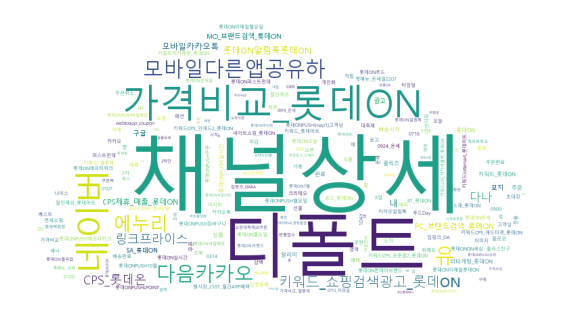

In [105]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(counter)

# 워드 클라우드 출력하기
plt.figure(figsize=(10, 10))    # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud);      # 워드 클라우드 출력

## 가격비교유무와 유입매체 분석

위 그래프로 디폴트 채널상세 말고도 가격비교도 꽤 있다는 것을 알 수 있었다. 따라서 유입채널에 '가격비교'가 들어간 채널들만 추출해서 분석을 진행한다.

In [106]:
df_pc = df[df['유입채널'].str.contains('가격비교')] # 유입채널에 가격비교가 들어간 채널
df_pc

,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,배송회수구분,진행단계,구매확정,주문완료일시,구매확정일시,출고지시일,상태처리일시,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리,롯데맴버스오프라인고객번호,롯데맴버스온라인고객번호,회원번호,총결제금액
주문접수일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:38:13,2022010111866837,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,kim6****,CHT,2022010111866837_1,주문,배송,배송완료,구매확정,2022-01-01 00:38:13,2022-01-11 02:52:49,2022-01-01,2022-01-03,CJ 다담 된장찌개양념 530G x3,단일상품,LO1135162715,CJ 다담 된장찌개양념 530G x3,LO1135162715_1135162716,단일상품,16240,1,가공식품 > 장류 > 된장/쌈장/청국장,NaN,NaN,NaN,16240
2022-01-01 04:35:17,2022010111875631,MO WEB,일반주문,[다음카카오] PCS 가격비교_롯데ON,LPOINT통합회원,happ****,CHT,2022010111875631_1,주문,배송,배송완료,구매확정,2022-01-01 04:35:17,2022-01-12 02:33:26,2022-01-01,2022-01-04,CJ 다담 된장찌개양념 530G X 4개,단일상품,LO1517718327,CJ 다담 된장찌개양념 530G X 4개,LO1517718327_1517718328,단일상품,21660,1,가공식품 > 장류 > 된장/쌈장/청국장,NaN,NaN,NaN,21660
2022-01-01 08:46:28,2022010111881962,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,소셜간편회원,NaN,CHT,2022010111881962_1,주문,배송,배송완료,구매확정,2022-01-01 08:46:28,2022-01-12 02:33:30,2022-01-01,2022-01-04,CJ 다담 된장찌개양념 530G X 4개,단일상품,LO1517718327,CJ 다담 된장찌개양념 530G X 4개,LO1517718327_1517718328,단일상품,21660,1,가공식품 > 장류 > 된장/쌈장/청국장,NaN,NaN,NaN,21660
2022-01-01 08:56:17,2022010111882612,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,소셜간편회원,NaN,CHT,2022010111882612_1,주문,배송,배송완료,구매확정,2022-01-01 14:09:39,2022-01-12 02:33:38,2022-01-01,2022-01-04,맥스봉숯불구이맛핫바 90G x20,단일상품,LO1134951458,맥스봉숯불구이맛핫바 90G x20,LO1134951458_1134951459,단일상품,26000,2,냉장/냉동/간편식 > 햄/소시지/베이컨 > 햄/소시지,NaN,NaN,NaN,52000
2022-01-01 12:12:39,2022010111902137,PC,일반주문,[다나와] PCS 가격비교_롯데ON,LPOINT통합회원,bhst****,CHT,2022010111902137_1,주문,배송,배송완료,구매확정,2022-01-01 12:12:39,2022-01-12 02:42:34,2022-01-01,2022-01-04,고메 나가사키짬뽕 640g 2인분 x3,단일상품,LO1031380060,고메 나가사키짬뽕 640g 2인분 x3,LO1031380060_1031380061,단일상품,20940,1,가공식품 > 면류 > 중화면,NaN,NaN,NaN,20940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 20:39:35,2022093018616327,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,LPOINT통합회원,susa****,CHT,2022093018616327_1,취소(주문취소),배송,취소완료,구매미확정,NaT,NaT,NaT,2022-10-03,CJ 햇반 쿡반 주먹밥 5종 골라담기,햇반쿡반 불고기주먹밥500G / 햇반쿡반 버터장조림주먹밥500G / 햇반쿡반 치즈닭...,LO1711653014,CJ 햇반 쿡반 주먹밥 5종 골라담기,LO1711653014_1711653130,햇반쿡반 불고기주먹밥500G / 햇반쿡반 버터장조림주먹밥500G / 햇반쿡반 치즈닭...,20000,1,냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스,NaN,NaN,1.004023e+10,20000
2022-09-30 21:54:52,2022093018624299,PC,일반주문,[네이버] PCS 가격비교_롯데ON,LPOINT통합회원,astropi,CHT,2022093018624299_1,주문,배송,배송완료,구매확정,2022-09-30 21:54:52,2022-10-14 02:13:30,2022-09-30,2022-10-06,[CJ직배송]비비고 순살고등어구이 60gx8개,단일상품,LO1908944881,[CJ직배송]비비고 순살고등어구이 60gx8개,LO1908944881_1908944882,단일상품,28500,1,냉장/냉동/간편식 > 돈가스/고로케/너겟 > 돈가스,NaN,NaN,1.001102e+10,28500
2022-09-30 22:54:45,2022093018631056,MO WEB,일반주문,[네이버] PCS 가격비교_롯데ON,LPOINT통합회원,sja8308,MAT29675,2022093018631056_2,주문,배송,배송완료,구매확정,2022-09-30 22:54:45,2022-10-15 02:12:22,2022-09-30,2022-10-07,[CJ직배송]쁘띠첼 5종 세트_30개(포도파인애플복숭아밀감 망고),단일상품,LO1911745321,[CJ직배송]쁘띠첼 5종 세트_30개(포도파인애플복숭아밀감 망고),LO1911745321_1911745322,단일상품,27000,1,과자/간식 > 캔디/껌/캐러멜 > 젤리/푸딩,NaN,NaN,1.000924e+10,27000


'가격비교'를 하며 들어온 사람은 대부분 'APP'이 아닌 'MO WEB'과 'PC'를 주로 이용한다.

In [109]:
df_pc.groupby(['유입매체']).size()

유입매체
APP        273
MO WEB    7945
PC        3620
TABLET      47
dtype: int64

In [107]:
df_pc.pivot_table('수량', index='유입매체',
                  columns=df_pc.index.hour,` aggfunc='count')

주문접수일시,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
유입매체,,,,,,,,,,,,,,,,,,,,,,,,
APP,10.0,4.0,8.0,6.0,3.0,5.0,7.0,4.0,8.0,7.0,18.0,13.0,11.0,11.0,23.0,11.0,16.0,14.0,11.0,12.0,14.0,14.0,22.0,21.0
MO WEB,386.0,199.0,90.0,58.0,59.0,49.0,112.0,248.0,280.0,317.0,343.0,401.0,394.0,363.0,320.0,359.0,386.0,428.0,402.0,523.0,497.0,510.0,526.0,695.0
PC,122.0,63.0,28.0,19.0,17.0,19.0,27.0,94.0,134.0,214.0,266.0,283.0,232.0,241.0,228.0,248.0,218.0,171.0,143.0,145.0,131.0,155.0,207.0,215.0
TABLET,2.0,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,3.0,3.0,1.0,3.0,NaN,5.0,NaN,2.0,3.0,1.0,5.0,2.0,3.0,7.0,3.0


가격비교를 통해 들어오는 사람을 겨냥해 MO WEB과 PC의 가격비교 페이지에서의 물품가격을 상대적으로 낮추거나 사람이 몰리는 시간대(예를 들어 23시)에 쿠폰을 MO WEB과 PC 이용자에게 쿠폰을 발행하는 등의 전략도 가능할 것으로 보인다.

In [108]:
df_npc = df[~df['유입채널'].str.contains('가격비교')] # 유입채널에 가격비교가 들어가지 않은 채널
df_npc

,주문번호,유입매체,주문구분,유입채널,회원구분,아이디,전시유입코드,상품주문번호,유형,배송회수구분,진행단계,구매확정,주문완료일시,구매확정일시,출고지시일,상태처리일시,전시상품명,전시단품명,판매자상품번호,판매자상품명,판매자단품번호,판매자단품명,판매가,수량,표준카테고리,롯데맴버스오프라인고객번호,롯데맴버스온라인고객번호,회원번호,총결제금액
주문접수일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:17:11,2022010111864975,MO WEB,일반주문,디폴트 채널상세,LPOINT통합회원,jsda****,SCH비비고갈비탕,2022010111864975_1,취소(주문취소),배송,취소완료,구매미확정,2022-01-01 00:17:11,NaT,NaT,2022-01-03,CJ 비비고 갈비탕 400g x4,단일상품,LO1031678373,CJ 비비고 갈비탕 400g x4,LO1031678373_1031678374,단일상품,18830,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,18830
2022-01-01 00:38:42,2022010111866938,APP,일반주문,디폴트 채널상세,LPOINT통합회원,ggg9****,SCH쁘띠첼복숭아,2022010111866938_5,취소(주문취소),배송,취소완료,구매미확정,2022-01-01 00:38:42,NaT,NaT,2022-01-03,[CJ제일제당] 쁘띠첼 복숭아 90g*9번들X2EA,단일상품,LO1354545470,[CJ제일제당] 쁘띠첼 복숭아 90g*9번들X2EA,LO1354545470_1354545471,단일상품,22300,1,과자/간식 > 디저트/케이크 > 푸딩,NaN,NaN,NaN,22300
2022-01-01 02:54:53,2022010111873735,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873735_1,주문,배송,배송완료,구매확정,2022-01-01 02:54:53,2022-01-14 02:05:19,2022-01-01,2022-01-06,비비고 국물요리 BEST 9종,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,NaN,NaN,NaN,33240
2022-01-01 02:56:35,2022010111873774,APP,일반주문,디폴트 채널상세,LPOINT통합회원,savi****,RSI,2022010111873774_1,주문,배송,배송완료,구매확정,2022-01-01 02:56:35,2022-01-14 02:05:23,2022-01-01,2022-01-06,비비고 국물요리 BEST 9종,단일상품,LO1495023715,비비고 국물요리 BEST 9종,LO1495023715_1495023716,단일상품,33240,1,냉장/냉동/간편식 > 즉석밥/죽/스프 > 즉석밥,NaN,NaN,NaN,33240
2022-01-01 08:00:37,2022010111879668,APP,일반주문,디폴트 채널상세,LPOINT통합회원,cats****,SCH비비고추어탕,2022010111879668_2,주문,배송,배송완료,구매확정,2022-01-01 08:00:37,2022-01-12 02:33:26,2022-01-01,2022-01-04,비비고 추어탕 460Gx5개,단일상품,LO1249549902,비비고 남도식 추어탕 460Gx5개,LO1249549902_1249549903,단일상품,23680,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,NaN,23680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30 23:50:40,2022093018638344,APP,일반주문,디폴트 채널상세,LPOINT통합회원,lysbon,CHT,2022093018638344_1,주문,배송,배송완료,구매확정,2022-09-30 23:50:40,2022-10-16 02:12:15,2022-10-01,2022-10-08,[L포인트 3000p 증정]LAST DAY EVENT,햇반 매일콩잡곡밥 210g x 3 x 12개,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869748,햇반 매일콩잡곡밥 210g x 3 x 12개,54000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,1.001064e+10,54000
2022-09-30 23:52:41,2022093018638709,APP,일반주문,디폴트 채널상세,LPOINT통합회원,wocns2,CHT,2022093018638709_1,주문,배송,배송완료,구매확정,2022-09-30 23:52:41,2022-10-14 02:21:00,2022-10-01,2022-10-06,[L포인트 3000p 증정]LAST DAY EVENT,비비고 사골곰탕 500g x18봉,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869755,비비고 사골곰탕 500g x18봉,24500,2,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,1.001256e+10,49000
2022-09-30 23:56:28,2022093018639349,APP,일반주문,디폴트 채널상세,LPOINT통합회원,xraydos,RSI,2022093018639349_1,주문,배송,배송완료,구매확정,2022-09-30 23:56:28,2022-10-15 02:12:22,2022-10-01,2022-10-07,[L포인트 3000p 증정]LAST DAY EVENT,햇반 매일오곡밥 210Gx24개,LO1978869746,[L포인트 3000p 증정]★LAST DAY EVENT★,LO1978869746_1978869753,햇반 매일오곡밥 210Gx24개,37000,1,냉장/냉동/간편식 > 국/탕/찌개 > 국/탕,NaN,NaN,1.001334e+10,37000


가격비교를 통해 들어오지 않은 사람은 대부분 APP을 이용한다.

In [110]:
df_npc.groupby(['유입매체']).size()

유입매체
APP       66244
MO WEB    12825
PC        11062
TABLET       60
삼성냉장고         1
dtype: int64

In [111]:
df_npc.pivot_table('수량', index='유입매체',
                  columns=df_npc.index.hour, aggfunc='sum')

주문접수일시,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
유입매체,,,,,,,,,,,,,,,,,,,,,,,,
APP,3253.0,2649.0,1630.0,955.0,676.0,818.0,1367.0,2719.0,4277.0,4360.0,4217.0,4011.0,3858.0,3453.0,2696.0,2534.0,2731.0,3320.0,3650.0,3533.0,3423.0,4526.0,5868.0,6449.0
MO WEB,563.0,507.0,246.0,156.0,151.0,146.0,281.0,566.0,937.0,843.0,799.0,811.0,618.0,681.0,550.0,639.0,674.0,685.0,757.0,601.0,658.0,699.0,907.0,1221.0
PC,436.0,328.0,170.0,157.0,98.0,61.0,84.0,169.0,478.0,710.0,800.0,866.0,711.0,681.0,752.0,727.0,679.0,652.0,543.0,503.0,844.0,775.0,824.0,903.0
TABLET,2.0,20.0,NaN,3.0,1.0,NaN,NaN,NaN,9.0,NaN,5.0,6.0,6.0,2.0,5.0,4.0,4.0,2.0,1.0,3.0,4.0,1.0,4.0,8.0
삼성냉장고,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


이를 시각적으로 표현하기 위해 다음과 같은 처리를 한다.

In [114]:
df_npc = df.copy()

# 유입채널에 가격비교가 들어가면 가격비교
# 그렇지않으면 일반유입인 '가격비교유무' 칼럼을 새로 생성
df_npc['가격비교유무'] = np.where(df_npc['유입채널'].str.contains('가격비교'),
                                   '가격비교', '일반유입')

by_g는 유입매체와 가격비교유무로 그룹지어 가격비교와의 관계를 효과적으로 나타낼 수 있다.

In [115]:
by_g = df_npc.groupby(['유입매체', '가격비교유무'])

In [116]:
# 유입매체별 가격비교유무를 나타내고 unstack()으로 2차원 데이터프레임으로 생성
agg_counts = by_g.size().unstack().fillna(0) 

agg_counts

가격비교유무,가격비교,일반유입
유입매체,,
APP,273.0,66244.0
MO WEB,7945.0,12825.0
PC,3620.0,11062.0
TABLET,47.0,60.0
삼성냉장고,0.0,1.0


In [118]:
count_subset = agg_counts.stack() # 다시 계층형 인덱스를 가진 시리즈로 변환

count_subset.name = 'total'    # 이름을 'total'로 설정

count_subset = count_subset.reset_index() # reset_index()로 계층형 인덱스를 각각의 인덱스로 변경

count_subset

,유입매체,가격비교유무,total
0,APP,가격비교,273.0
1,APP,일반유입,66244.0
2,MO WEB,가격비교,7945.0
3,MO WEB,일반유입,12825.0
4,PC,가격비교,3620.0
5,PC,일반유입,11062.0
6,TABLET,가격비교,47.0
7,TABLET,일반유입,60.0
8,삼성냉장고,가격비교,0.0
9,삼성냉장고,일반유입,1.0


위 표를 시각화하면 다음과 같다.

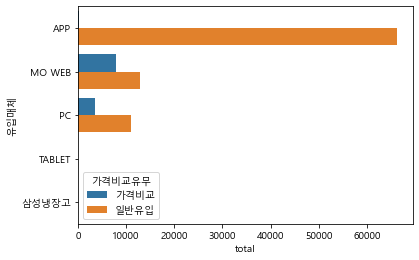

In [120]:
sns.barplot(x='total', y='유입매체', hue='가격비교유무', data=count_subset);

TABLET이나 삼성냉장고는 다른 항목에 비해 상대적으로 개수가 너무 적기때문에 시각화한 표에 나타나지 않았다. 따라서 이들을 정규화한 후 다시 나타낸다.

In [124]:
# 정규화 함수
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('유입매체').apply(norm_total)

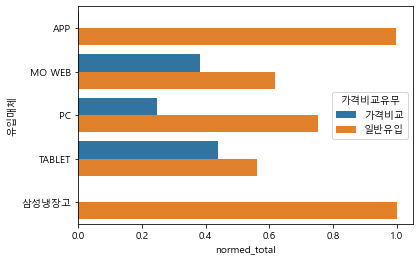

In [123]:
sns.barplot(x='normed_total', y='유입매체', hue='가격비교유무', data=results);

확실히 가격비교를 통해 들어오는 매체는 MO WEB, PC 그리고 TABLET인 것을 보여준다.

### 가격비교유무와 유입매체 분석 결과

<ol>
    <li><strong>대부분의 구매자는 MO WEB과 PC를 통해 가격비교를 하며 구매를 진행한다.</strong></li>
    </ol>

## 가격비교유무와 시간별 분석

다음은 유입매체가 아닌 월별 가격비교유무를 분석해보고자 한다. 코드는 위와 동일하다.

In [125]:
agg_counts = df_npc.groupby([df_npc.index.hour, '가격비교유무']).size().unstack().fillna(0)

agg_counts

가격비교유무,가격비교,일반유입
주문접수일시,,
0,520,3739
1,267,2954
2,127,1671
3,83,1077
4,79,760
5,75,851
6,146,1403
7,346,2856
8,422,4877


In [126]:
count_subset = agg_counts.stack()

count_subset.name = 'total'

count_subset = count_subset.reset_index()

count_subset

,주문접수일시,가격비교유무,total
0,0,가격비교,520
1,0,일반유입,3739
2,1,가격비교,267
3,1,일반유입,2954
4,2,가격비교,127
5,2,일반유입,1671
6,3,가격비교,83
7,3,일반유입,1077
8,4,가격비교,79
9,4,일반유입,760


In [128]:
results = count_subset.groupby('주문접수일시').apply(norm_total)

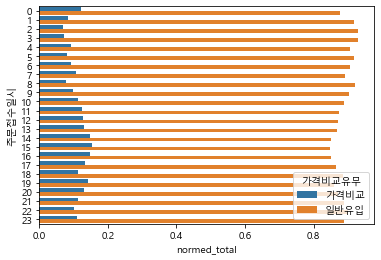

In [130]:
sns.barplot(x='normed_total', y='주문접수일시', hue='가격비교유무', data=results, orient='h');

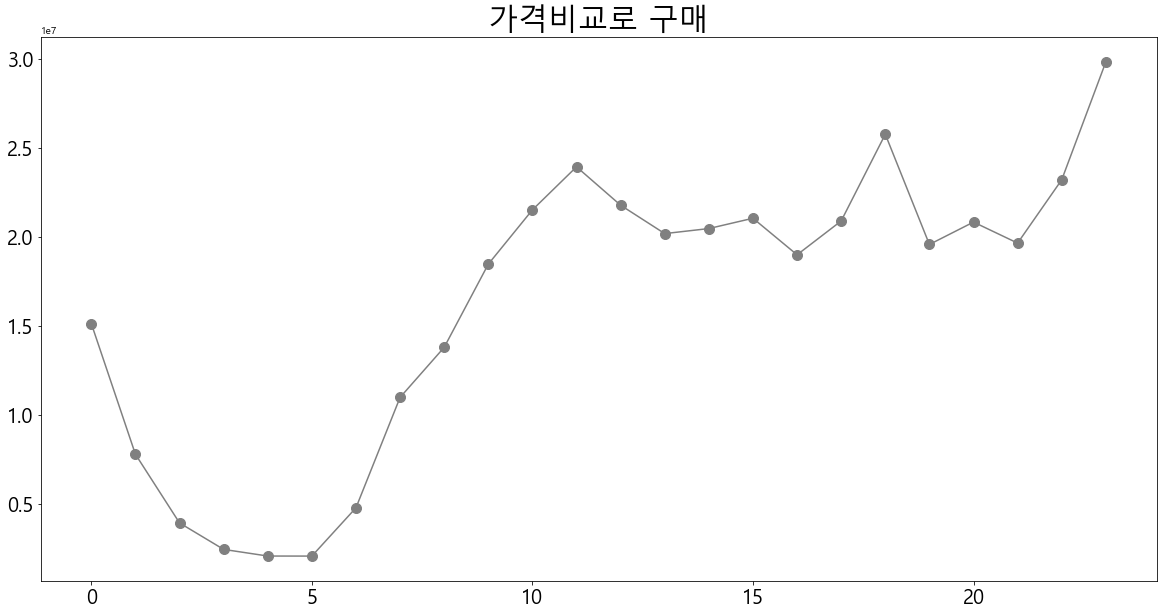

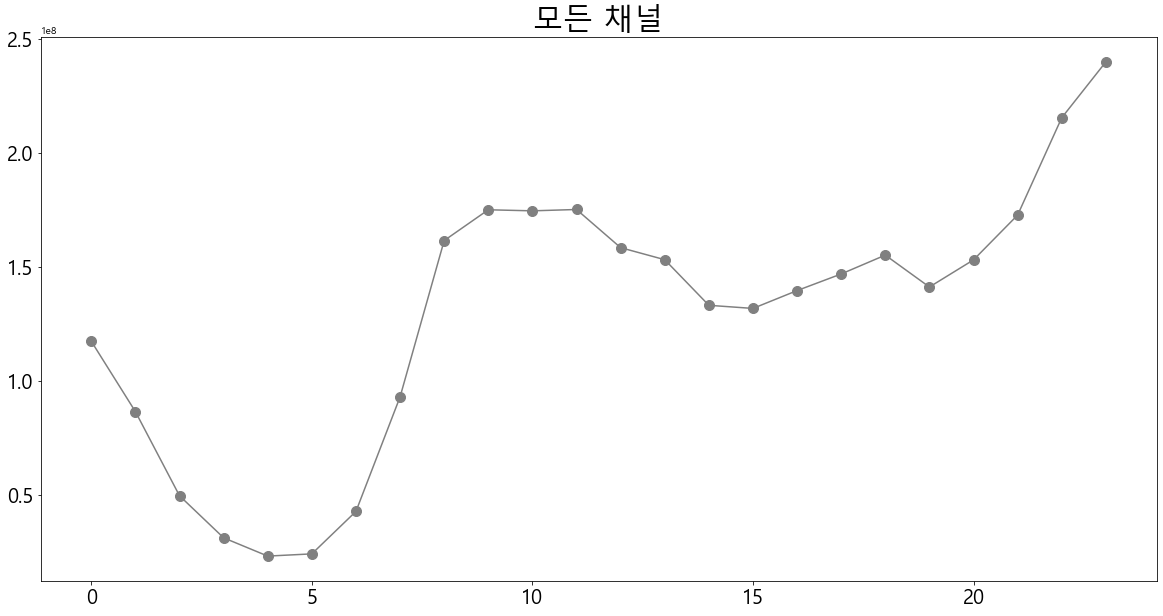

In [140]:
plot_line(df_pc.groupby([df_pc.index.hour]).sum()['총결제금액'], '가격비교로 구매') # 가격비교 그래프
plot_line(df_by_hour, title='모든 채널') # 모든 채널 그래프

### 가격비교유무와 시간별 분석 결과 

<ol>
    <li><strong>시간별 매출 그래프와 비슷한 양상을 띄며, 상대적으로 14시와 15시에 가격비교를 하며 사용자가 많이 유입된다.</strong></li>

## 결론

CJ제일제당의 내부 데이터를 활용해 분석한 결과를 종합하면 다음과 같다.

유입매체별 매출 분석은 CJ제일제당 1월부터 9월까지의 매출 절반 이상이 'APP'의 매체를 통해 이루어졌음을 확인할 수 있었다. 이때 APP을 통한 유입은 61.7%로 상당수의 고객이 APP를 이용한 구매를 함을 알 수 있다.

월별 매출 분석은 '주문접수일시'를 기준으로 8월이 약 31.9%의 비율로 가장 높았고, 2월이 1.46% 비율로 가장 낮음을 확인할 수 있었다. 다음으로 요일별 매출 분석 결과로는 일주일 중 수요일의 매출이 20.4%로 가장 높았으며, 토요일의 매출이 9.6%로 가장 낮음을 확인하여 예상과는 다른 수치를 보였다. 시간대별 매출 분석으로는 0시부터 4시까지는 하락세, 그 후 11시까지 증가세를 보이다가 15시까지는 다시 하락을, 그 후에는 다시 증가세를 보이는 그래프를 나타냄을 통해 오전과 오후 9~11시 사이의 매출이 가장 높아짐을 확인할 수 있었다.

유입채널별 매출 분석은 디폴트 채널상세를 통한 유입이 매출에 크게 이바지하고 있음을 확인할 수 있었다.

매출 상위 제품을 분석한 결과, 상위 10위 제품의 경우 매출이 급증하는 달을 확인할 수 있었다. 사례로 '비비고 사골곰탕 500g x 18봉'의 제품의 매출이 6월에 급증하는 것이 있다. 이렇듯 수량 상위 10개 제품은 전체 수량의 31.2%를 차지할 만큼 상당한 매출을 차지하고 있으며 특정 달(6월, 8일)에 매출이 급증하는 것을 확인할 수 있다.

여기에 더 나아가 월별 제품 매출 분석 결과를 통해 포도씨유가 앞서 언급한 특정 매출 상승 월(6월,8월)이 아닌 5월에 급증한 것을 바탕으로 추가 분석하여 포도씨유 상품 구매 이력 데이터를 바탕으로 유입채널별 개수를 확인한 결과, [모바일]다른앱공유하기로 유입한 이력이 총 1,076개로 이러한 이력이 5월인 것을 확인할 수 있었다. 즉, 5월에 진행한 포도씨유 다른앱공유하기 이벤트가 성공리에 이루어진 것을 알 수 있어 이에 대한 추가적인 전략을 제시할 수 있었다.

유입채널 분석을 통해 '가격비교'로 접속한 고객 대부분은 'APP'이 아닌 'MO WEB'과 'PC'를 이용한 것을 확인할 수 있었으며 이를 바탕으로 가격비교를 통해 접속한 고객을 타게팅하여 접속 시간0이 많은 시간대에 제품가격을 상대적으로 낮추는 세일을 진행하거나, 쿠폰을 발행하는 등의 전략도 제시할 수 있었다. 추가로 14시와 15시에 가격 비교를 하는 고객이 많이 유입됨을 확인할 수 있었다.

해당 데이터가 CJ제일제당의 1월부터 9월까지의 실제 데이터를 활용한 분석을 통해 유의미한 결과를 도출하였기에 이러한 결과를 바탕으로 제시한 전략은 영향력이 있을 것으로 판단된다.